
# Project: Investigate a Dataset - [No Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### No Show Appointment Description 

> For this project, I have chosen "No-show appointment" to analyse. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments as well as the factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment. A number of characteristics about the patient are given below.

<ul> 
    <li><b> ‘ScheduledDay’</b> tells us on what day the patient set up their appointment.</li>
    <li><b> ‘Neighborhood’</b> indicates the location of the hospital.</li>
    <li><b> ‘Scholarship’</b> indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li><b> 'No show'</b> it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
    <li><b> 'PatientId'</b> Patient identification number</li>
    <li><b> 'Appointment ID'</b> unique identification number for the appointment scheduled</li>
    <li><b> 'Gender'</b> Patient Gender Male or Female</li>
    <li><b> 'SchelduleDay'</b> The day appointment was Schelduled</li> 
    <li><b> 'AppointmentDay'</b> The day the patient meet the doctor</li>
    <li><b> 'Age'</b> How old is the patient</li>
    <li><b> 'Hipertension'</b> Whether a patient has an hypertention or not</li>
    <li><b> 'Diebetes'</b>: Whether a patient has an Diebetes or not</li>
    <li><b> 'Alcoholism'</b> Whether a patient is taking Alcohol or not</li>
    <li><b> 'Handicap'</b> Whether a patient is an Handicap or not</li>
    <li><b> 'SMS_recieved'</b> Whether a patient got an SMS or not</li>
</ul>
    
    



### Question(s) for Analysis
<ol>
    <li>My primary question would be to determine the factors that are 
        important to predict if a patient will show up or not</li>
    <li>How does the age of a patient affect their likelihood of showing up or not?</li>
    <li> What gender tends to show up more?</li>
    <li> Do the patients who got scholarships tend to show up more?</li>
    <li>is there any relationship between missing the appointment and not recieving an SMS message?</li>
    
</ol>
   



<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [1]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
noShow_df = pd.read_csv('noshowappointment.csv')
noShow_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Assessing Data and Data Wragling

<ul>
    <li>Dataset shape</li>
    <li>Columns data type</li>
    <li>Missing Value</li>
    <li>Incorrect data types</li>
    <li>Duplicate data</li>
    <li>Data stats</li> 
</ul>

In [2]:
# Dataset shape

noShow_df.shape

(110527, 14)

In [3]:
# Columns data types
noShow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# checking if there is any null value
noShow_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# checking if there is any variable with duplicate value
noShow_df.duplicated().sum()

0

In [6]:
noShow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<AxesSubplot:>

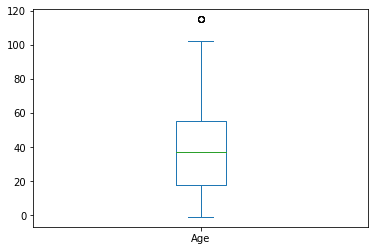

In [7]:
#checking for the outliers
noShow_df.Age.plot(kind = 'box')


### Data Cleaning


 <ul>
    <li>While assessing, two data columns were found to have incorrect data types: ScheduledDay and AppointmentDay. The columns are converted to datetime data type.</li>
    <li>PatientId is not in the correct data type, we will convert it to integer</li>
    <li>We have outliers which are -1 and 115. We will drop the outliers</li>
    <li>We have inconsistent data name</li>
    
</ul>

In [8]:
#Changing PatientID data type into integer

In [9]:
noShow_df['PatientId'] = noShow_df['PatientId'].astype('int64')
noShow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#Renaming the columns

In [11]:
noShow_df.rename(columns = {
                           'hipertension' : 'hypertension', 'Handcap' : 'Handicap', 'No-show' : 'no_show'
    }, inplace = True )
noShow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#confirming the data type
noShow_df.dtypes

PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
no_show           object
dtype: object

In [13]:
# convert Scheduled_date and Appointment_Date from object to timestamp

In [14]:
noShow_df['ScheduledDay'] = pd.to_datetime(noShow_df['ScheduledDay'])
noShow_df['AppointmentDay'] = pd.to_datetime(noShow_df['AppointmentDay'])

In [15]:
noShow_df['ScheduledDate'] = noShow_df['ScheduledDay'].dt.date
noShow_df['ScheduledDayNo'] = noShow_df['ScheduledDay'].dt.day
noShow_df['ScheduledMonth'] = noShow_df['ScheduledDay'].dt.month
noShow_df['AppointmentDate'] = noShow_df['AppointmentDay'].dt.date
noShow_df['AppointmentDayNo'] = noShow_df['AppointmentDay'].dt.day
noShow_df['AppointmentMonth'] = noShow_df['AppointmentDay'].dt.month



In [16]:
noShow_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show,ScheduledDate,ScheduledDayNo,ScheduledMonth,AppointmentDate,AppointmentDayNo,AppointmentMonth
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,3,5,2016-06-07,7,6
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,3,5,2016-06-07,7,6
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,27,4,2016-06-07,7,6
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,27,4,2016-06-07,7,6
110526,377511518121127,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,27,4,2016-06-07,7,6


## Investigating the patients ID

In [17]:
noShow_df.PatientId.value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
                   ..
862263621811        1
9267587227475       1
5764355598913       1
5712491287569       1
15576631729893      1
Name: PatientId, Length: 62299, dtype: int64

Patient ID with 822145925426128 had a visitation for 88 times

## Investigating Age column

In [18]:
noShow_df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [19]:
# we have only 1 value with -1 and 5 values with 115. we are dropping the values

In [20]:
noShow_df[(noShow_df['Age'] == -1) | (noShow_df['Age'] == 115)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show,ScheduledDate,ScheduledDayNo,ScheduledMonth,AppointmentDate,AppointmentDayNo,AppointmentMonth
63912,31963211613981,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2016-05-16,16,5,2016-05-19,19,5
63915,31963211613981,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2016-05-16,16,5,2016-05-19,19,5
68127,31963211613981,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,2016-04-08,8,4,2016-05-16,16,5
76284,31963211613981,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No,2016-05-30,30,5,2016-05-30,30,5
97666,748234579244724,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No,2016-05-19,19,5,2016-06-03,3,6
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,2016-06-06,6,6,2016-06-06,6,6


In [21]:
noShow_df = noShow_df.drop([63912, 63915, 68127, 76284, 97666, 99832], axis = 0)

In [22]:
noShow_df[(noShow_df['Age'] == -1) | (noShow_df['Age'] == 115)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,no_show,ScheduledDate,ScheduledDayNo,ScheduledMonth,AppointmentDate,AppointmentDayNo,AppointmentMonth


In [23]:
noShow_df.shape

(110521, 20)

In [24]:
#Explore

<AxesSubplot:title={'center':'Gender By Count'}, ylabel='Gender'>

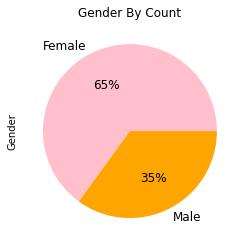

In [25]:
genderVis = round(noShow_df.Gender.value_counts()/len(noShow_df)*100)
genderVis.plot(kind = 'pie', colors = ['pink', 'orange'],autopct='%0.0f%%', labels = ['Female', 'Male'], fontsize = 12, title = 'Gender By Count')

The pie chart shows that the percentage of females is greater than that of males. 

In [26]:
noShow_df['Age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

In [27]:
Age_category = []

for lab, row in noShow_df.iterrows():
    if row['Age'] <= 20:
        Age_category.append('0-20')
    elif row['Age'] <= 40:
        Age_category.append ('20-40')
    elif row['Age'] <= 60:
        Age_category.append ('40-60')
    elif row['Age'] <= 80:
        Age_category.append ('60-80')
    else:
        Age_category.append('80-110')
    
    
    

In [28]:
noShow_df['AgeCategory'] = Age_category 
noShow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handicap,SMS_received,no_show,ScheduledDate,ScheduledDayNo,ScheduledMonth,AppointmentDate,AppointmentDayNo,AppointmentMonth,AgeCategory
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0,0,No,2016-04-29,29,4,2016-04-29,29,4,60-80
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0,0,No,2016-04-29,29,4,2016-04-29,29,4,40-60
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0,0,No,2016-04-29,29,4,2016-04-29,29,4,60-80
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0,0,No,2016-04-29,29,4,2016-04-29,29,4,0-20
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0,0,No,2016-04-29,29,4,2016-04-29,29,4,40-60


<AxesSubplot:>

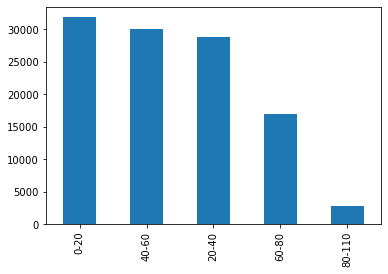

In [29]:
Age_cate = noShow_df['AgeCategory'].value_counts()
Age_cate.plot(kind = 'bar')

The patients who fall into the category of 0-20 are more, followed by 40-60, and the least is 80-110.

### Finding the percentage of the age category that takes more alcohol

In [30]:
noShow_df.groupby('AgeCategory')['Alcoholism'].value_counts()


AgeCategory  Alcoholism
0-20         0             31813
             1                35
20-40        0             28105
             1               730
40-60        0             28221
             1              1860
60-80        0             16196
             1               714
80-110       0              2826
             1                21
Name: Alcoholism, dtype: int64

In [31]:
zero2Twenty = 35/(31813 + 35) * 100
zero2Twenty

0.10989701080130622

In [32]:
twenty2Fourty = 730/(730 + 28105) * 100
twenty2Fourty

2.5316455696202533

In [33]:
forty2Sixty = 1860/(1860+28221) * 100
forty2Sixty

6.183305076294006

In [34]:
sixty2Eighty = 714/(714 + 16196) * 100
sixty2Eighty

4.222353636901242

In [35]:
eighty2OneTen = 21/(21 + 2826) * 100
eighty2OneTen

0.7376185458377239

Text(0, 0.5, 'Percent')

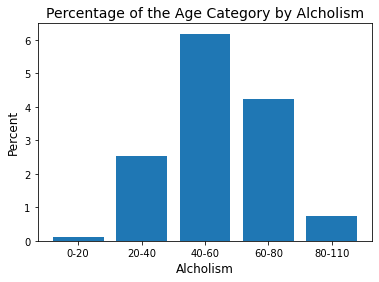

In [36]:
plt.bar (['0-20', '20-40', '40-60', '60-80', '80-110'], [zero2Twenty, twenty2Fourty, forty2Sixty, sixty2Eighty, eighty2OneTen])
plt.title('Percentage of the Age Category by Alcholism', fontsize = 14)
plt.xlabel('Alcholism', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)

The Age category 40-60 has highest Alcoholism

### Finding the percentage of  the age category that has more diabetes

In [37]:
valCal = noShow_df.groupby('AgeCategory')['Diabetes'].value_counts()
valCal

AgeCategory  Diabetes
0-20         0           31787
             1              61
20-40        0           28328
             1             507
40-60        0           27093
             1            2988
60-80        0           13109
             1            3801
80-110       0            2261
             1             586
Name: Diabetes, dtype: int64

In [38]:
O =valCal[1]/(valCal[1] + valCal[0]) *100
O  

0.1915347902537051

In [39]:
T =valCal[3]/(valCal[3] + valCal[2]) *100
T

1.7582798682157101

In [40]:
F = valCal[5]/(valCal[5] + valCal[4]) *100
F

9.93318041288521

In [41]:
S = valCal[7]/(valCal[7] + valCal[6]) *100
S

22.477823772915436

In [42]:
E = valCal[9]/(valCal[9] + valCal[8]) *100
E

20.583069898138394

Text(0, 0.5, 'Percent')

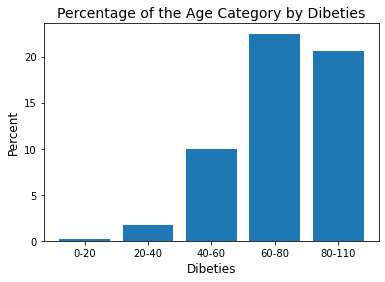

In [43]:
plt.bar( ['0-20', '20-40', '40-60', '60-80', '80-110'], [O, T,F,S,E])
plt.title('Percentage of the Age Category by Dibeties', fontsize = 14)
plt.xlabel('Dibeties', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)

Age category 40 - 60 has the highest diabetics.

### Finding the percentage of Age category that has more hipertension

In [44]:
valCal = noShow_df.groupby('AgeCategory')['Hipertension'].value_counts()
valCal

AgeCategory  Hipertension
0-20         0               31799
             1                  49
20-40        0               27090
             1                1745
40-60        0               21076
             1                9005
60-80        1                9202
             0                7708
80-110       1                1799
             0                1048
Name: Hipertension, dtype: int64

In [45]:
O = valCal[1]/(valCal[1] + valCal[0]) *100
O  

0.15385581512182867

In [46]:
T =valCal[3]/(valCal[3] + valCal[2]) *100
T

6.051673313681291

In [47]:
F = valCal[5]/(valCal[5] + valCal[4]) *100
F

29.93583989893953

In [48]:
S = valCal[7]/(valCal[7] + valCal[6]) *100
S

45.58249556475458

In [49]:
E = valCal[9]/(valCal[9] + valCal[8]) *100
E

36.810677906568316

Text(0, 0.5, 'Percent')

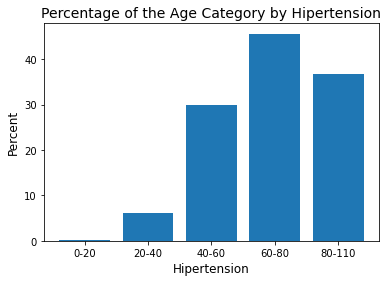

In [50]:
plt.bar( ['0-20', '20-40', '40-60', '60-80', '80-110'], [O, T,F,S,E])
plt.title('Percentage of the Age Category by Hipertension', fontsize = 14)
plt.xlabel('Hipertension', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)

Age category 60-80 has the highest percentage of patients with hipertention, follow by Age category 80-110

### Finding the waiting period by substracting AppointmentDayNo from ScheduledDayNo

In [51]:
noShow_df['waiting_time'] = (noShow_df.ScheduledDayNo - noShow_df.AppointmentDayNo)

Text(0, 0.5, 'Count')

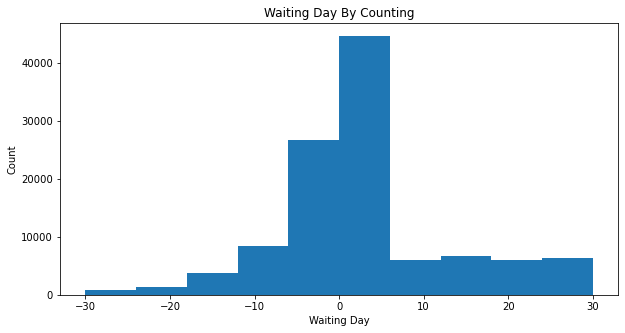

In [52]:
plt.figure(figsize = (10,5))
plt.hist(noShow_df['waiting_time'], bins = 10)
plt.title('Waiting Day By Counting')
plt.xlabel('Waiting Day')
plt.ylabel('Count')


0 waiting days had the highest number of patients, which shows that the highest number of patients were able to meet the doctor on the day scheduled for them.

In [53]:
noShow_df['waiting_month'] = (noShow_df.ScheduledMonth - noShow_df.AppointmentMonth)

Text(0, 0.5, 'Count')

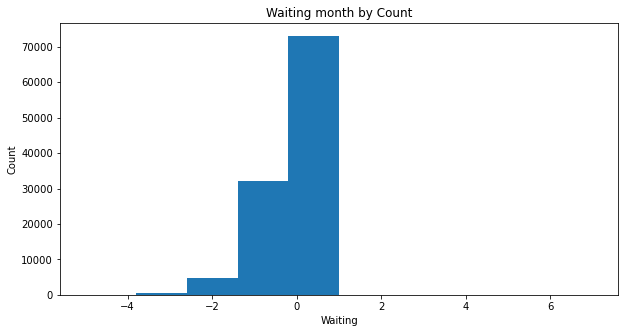

In [54]:
plt.figure(figsize = (10,5))
plt.hist(noShow_df['waiting_month'])
plt.title('Waiting month by Count')
plt.xlabel('Waiting')
plt.ylabel('Count')

0 waiting month had highest number of patients which shows that highest number of patients were able to meet the doctor on the day scheldule for them

Text(0, 0.5, 'Count')

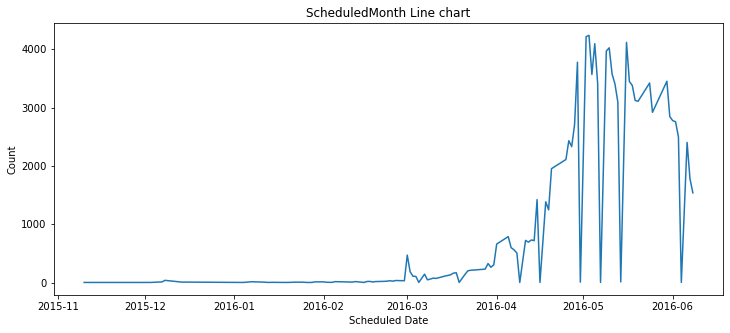

In [55]:
noShow_df['ScheduledDate'].value_counts().plot(kind = 'line', figsize = (12,5))
plt.title('ScheduledMonth Line chart')
plt.xlabel('Scheduled Date')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

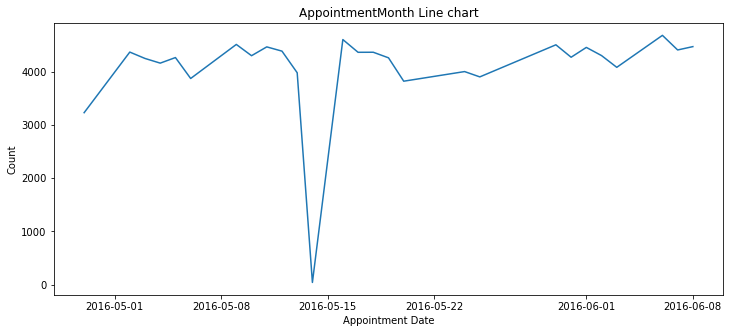

In [56]:
noShow_df['AppointmentDate'].value_counts().plot(kind = 'line', figsize = (12,5))
plt.title('AppointmentMonth Line chart')
plt.xlabel('Appointment Date')
plt.ylabel('Count')

In [57]:
def bar_chat(variable): 
    ans = noShow_df[variable].value_counts().plot(kind = 'bar', title = f'{variable} by Count', xlabel = f'{variable}', ylabel ='Count', style = ('fivethirtyeight')) 
    return ans

<AxesSubplot:title={'center':'Scholarship by Count'}, xlabel='Scholarship', ylabel='Count'>

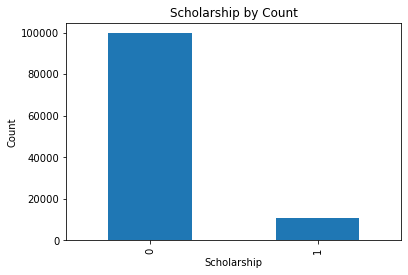

In [58]:
bar_chat('Scholarship')

Patients without schorlarship is the highest 

<AxesSubplot:title={'center':'SMS_received by Count'}, xlabel='SMS_received', ylabel='Count'>

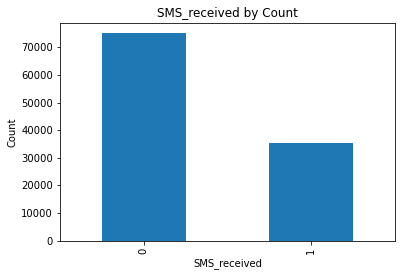

In [59]:
bar_chat('SMS_received')

Patients that did not recieve SMS is the highest 

<AxesSubplot:title={'center':'Hipertension by Count'}, xlabel='Hipertension', ylabel='Count'>

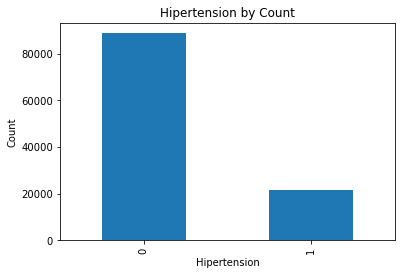

In [60]:
bar_chat('Hipertension')

Patients without hypertension have the highest 

<AxesSubplot:title={'center':'Diabetes by Count'}, xlabel='Diabetes', ylabel='Count'>

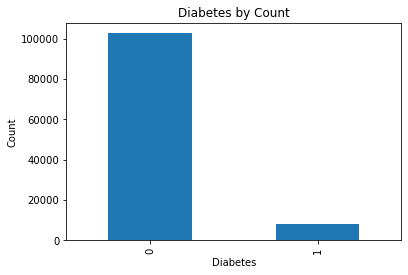

In [61]:
bar_chat('Diabetes')

Patients without diabetes are the highest.

<AxesSubplot:title={'center':'Alcoholism by Count'}, xlabel='Alcoholism', ylabel='Count'>

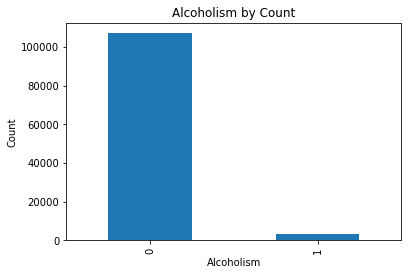

In [62]:
bar_chat('Alcoholism')

<AxesSubplot:title={'center':'Handicap by Count'}, xlabel='Handicap', ylabel='Count'>

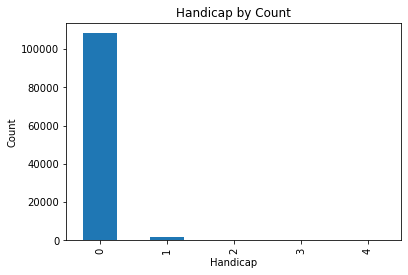

In [63]:
bar_chat('Handicap')

<AxesSubplot:title={'center':'no_show by Count'}, xlabel='no_show', ylabel='Count'>

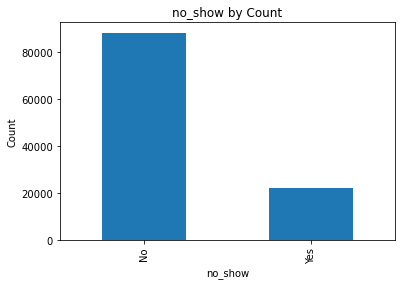

In [64]:
bar_chat('no_show')

<AxesSubplot:>

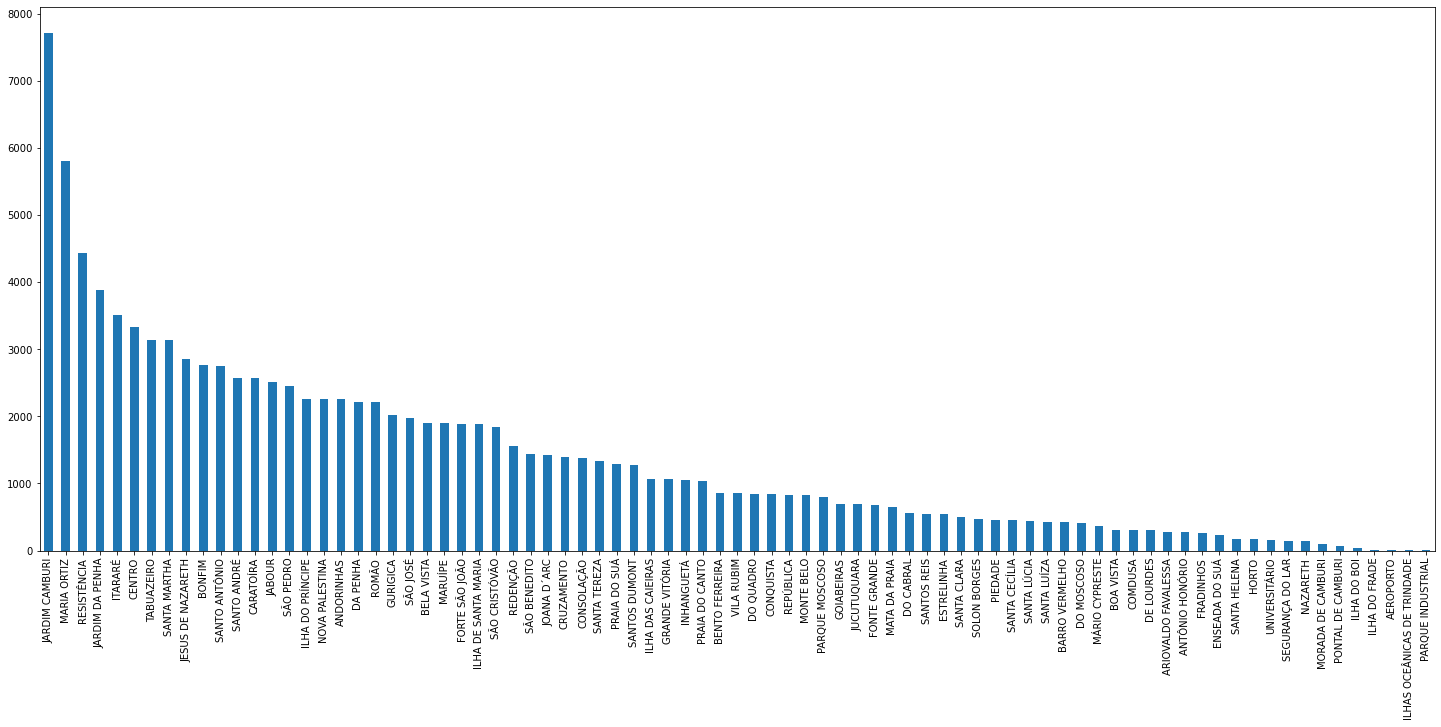

In [65]:
noShow_df['Neighbourhood'].value_counts().plot(kind = 'bar', figsize = (25,10))

Text(0.5, 1.0, 'Relationship between ScheduledDate and AppointmentDate')

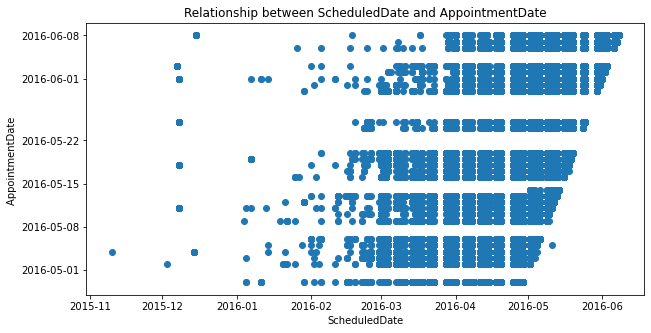

In [66]:
plt.figure(figsize = (10,5))
plt.scatter(x = noShow_df.ScheduledDate, y = noShow_df.AppointmentDate )
plt.xlabel('ScheduledDate')
plt.ylabel('AppointmentDate ')
plt.title('Relationship between ScheduledDate and AppointmentDate')

Text(0.5, 1.0, 'Relationship between ScheduledDay and AppointmentDay')

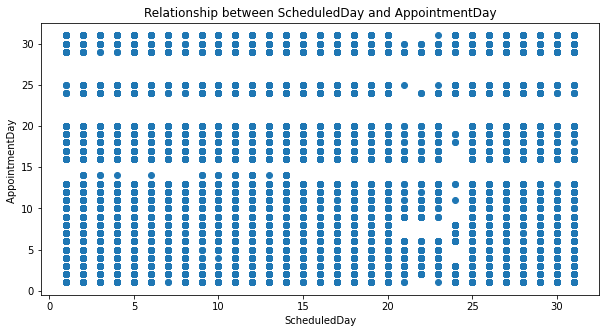

In [67]:
plt.figure(figsize = (10,5))
plt.scatter(x = noShow_df.ScheduledDayNo, y = noShow_df.AppointmentDayNo )
plt.xlabel('ScheduledDay')
plt.ylabel('AppointmentDay ')
plt.title('Relationship between ScheduledDay and AppointmentDay')

## Exploration Results:

- The pie chart shows that the percentage of females is greater than that of males.
- The patients who fall into the category of 0-20 are more, followed by 40-60, and the least is 80-110
- The age group 40-60 has the highest rate of alcoholism.
- Diabetics are most prevalent in the 40-60 age group.
- Age category 60-80 has the highest percentage of patients with hipertention, followed by age category 80-110.
- 0 waiting days had the highest number of patients, which shows that the highest number of patients were able to meet the doctor on the day scheduled for them/
- Scheldule date began on the <b>10th-11-2015</b> while Appointment date strated on the <b>29-04-2016</b>
    





    


<a id='eda'></a>
## Exploratory Data Analysis


### How does the age of a patient affect their likelihood of showing up or not?

In [68]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
noShow_df.columns
miss = noShow_df['no_show'] == 'Yes'
show = noShow_df['no_show'] == 'No'

Text(0, 0.5, 'Count')

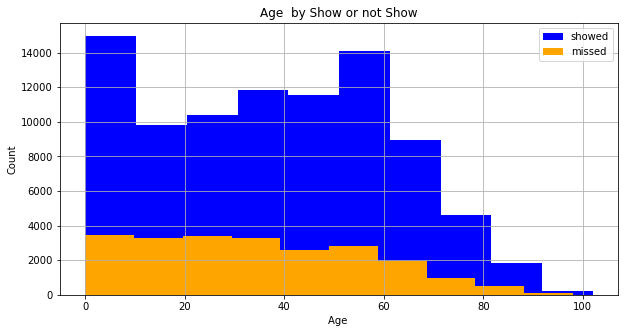

In [69]:
noShow_df[show].Age.hist(color = 'blue', label = 'showed', figsize = (10,5))
noShow_df[miss].Age.hist(color = 'orange', label = 'missed', figsize = (10,5))
plt.legend(fontsize = 10)
plt.title('Age  by Show or not Show')
plt.xlabel('Age ')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

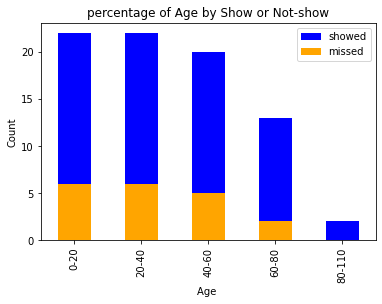

In [70]:
round(noShow_df[show]['AgeCategory'].value_counts()/len(noShow_df) * 100).plot(kind= 'bar', color = 'blue', label = 'showed')
round(noShow_df[miss]['AgeCategory'].value_counts()/len(noShow_df) * 100).plot(kind= 'bar', color = 'orange', label = 'missed')
plt.legend(fontsize = 10)
plt.title('percentage of Age by Show or Not-show')
plt.xlabel('Age ')
plt.ylabel('Count')


Following the exploration, we discovered that patients aged 0–40 had the highest number of missed appointments, followed by those aged 40–60, 60–80, and 80–110, who did not show any value for missing the appointment. Therefore, we could say age groups 80–110 tend not to miss their appointments.

## What gender tends to show up more?

In [71]:
G_counts = noShow_df.groupby('Gender')['no_show'].value_counts()
print(G_counts)

Gender  no_show
F       No         57243
        Yes        14591
M       No         30962
        Yes         7725
Name: no_show, dtype: int64


In [72]:
#percentage of female who missed the appointment
G_counts[1]/(G_counts[0] + G_counts[1]) * 100 

20.31210847231116

In [73]:
#percentage of male who missed the appointment
G_counts[3]/(G_counts[2] + G_counts[3]) * 100 


19.967947889471915

Text(0, 0.5, 'Percent')

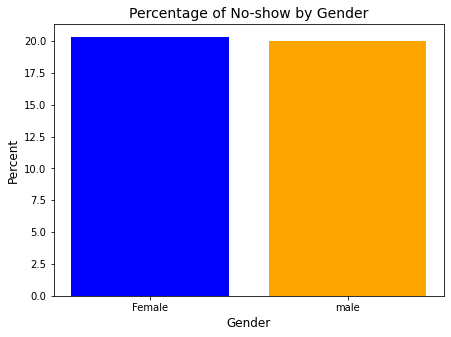

In [74]:
plt.figure(figsize = (7,5))
plt.bar(['Female', 'male'], [20.314870752655242, 19.967947889471915], color = ['blue', 'orange'])
plt.title('Percentage of No-show by Gender', fontsize = 14)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)


The percentage of females who did not show was 0.3 greater than the percentage of males who did not show. This is not significant enough to determine the gender that will miss the appointment next.

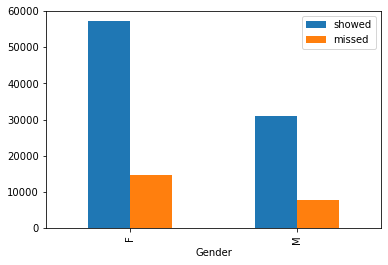

In [75]:
noShow_df.groupby('Gender')['no_show'].value_counts().unstack().plot(kind= 'bar')
plt.legend(['showed', 'missed'])

### Do the patients who got scholarship tend to show up?

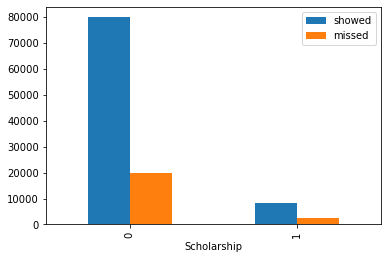

In [76]:
noShow_df.groupby('Scholarship')['no_show'].value_counts().unstack().plot(kind= 'bar')
plt.legend(['showed', 'missed'])

In [77]:
Schor_counts = noShow_df.groupby('Scholarship')['no_show'].value_counts()
print(Schor_counts)

Scholarship  no_show
0            No         79922
             Yes        19738
1            No          8283
             Yes         2578
Name: no_show, dtype: int64


In [78]:
#percentage of NoScholarship who missed the appointment
(19741/(79924))*100

24.699714728992543

In [79]:
#percentage of Scholarship who missed the appointment
(2578/(8283 + 2578)) * 100

23.73630420771568

Text(0, 0.5, 'Percent')

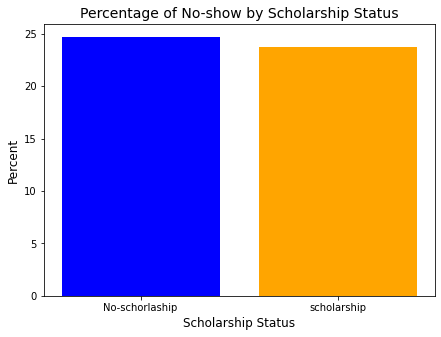

In [80]:
plt.figure(figsize = (7,5))
plt.bar(   ['No-schorlaship', 'scholarship'],[24.699714728992543, 23.73630420771568], color = ['blue', 'orange'])
plt.title('Percentage of No-show by Scholarship Status', fontsize = 14)
plt.xlabel('Scholarship Status', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)


The percentage of people who did not receive scholarships and did not show up was 1% greater than the percentage of people who got scholarships and did not show up.

### Do the patients who got SMS tend to show up?

<AxesSubplot:xlabel='SMS_received'>

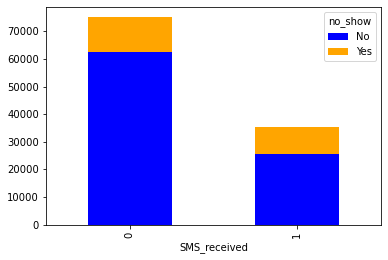

In [81]:
noShow_df.groupby('SMS_received')['no_show'].value_counts().unstack().plot(kind ='bar', stacked = True, color = ['blue', 'orange'])


In [82]:
noShow_df.groupby('SMS_received')['no_show'].value_counts()

SMS_received  no_show
0             No         62508
              Yes        12532
1             No         25697
              Yes         9784
Name: no_show, dtype: int64

In [83]:
SmsCount = noShow_df.groupby('SMS_received')['no_show'].value_counts()
SmsCount[0][1]/(SmsCount[0][0]+SmsCount[0][1]) * 100

16.70042643923241

In [84]:
SmsCount[1][1]/(SmsCount[1][0]+SmsCount[1][1]) * 100

27.575322003325724

Text(0, 0.5, 'Percent')

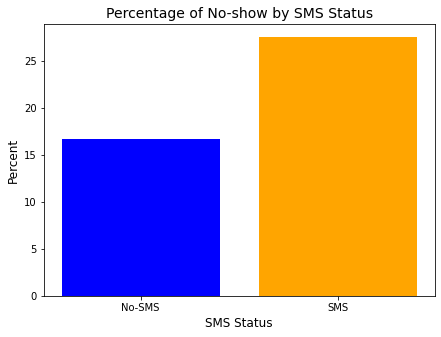

In [85]:
plt.figure(figsize = (7,5))
plt.bar(   ['No-SMS', 'SMS'],[16.703533926762965, 27.574544839637], color = ['blue', 'orange'])
plt.title('Percentage of No-show by SMS Status', fontsize = 14)
plt.xlabel('SMS Status', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)


 The percentage of people who got SMS and did not show is 10.8% more than the percentage of people who did not receive SMS.

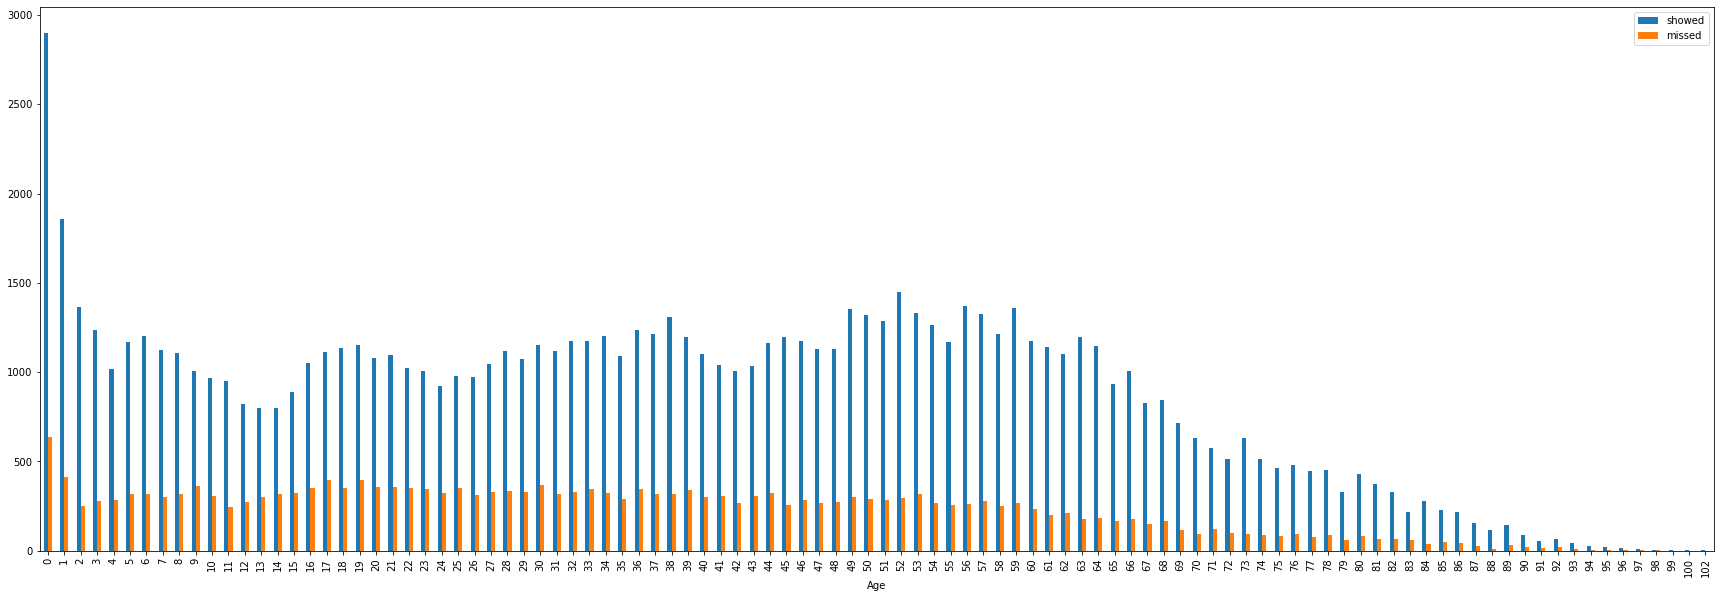

In [86]:
noShow_df.groupby('Age')['no_show'].value_counts().unstack().plot(kind= 'bar', figsize = (30,10))
plt.legend(['showed', 'missed'])

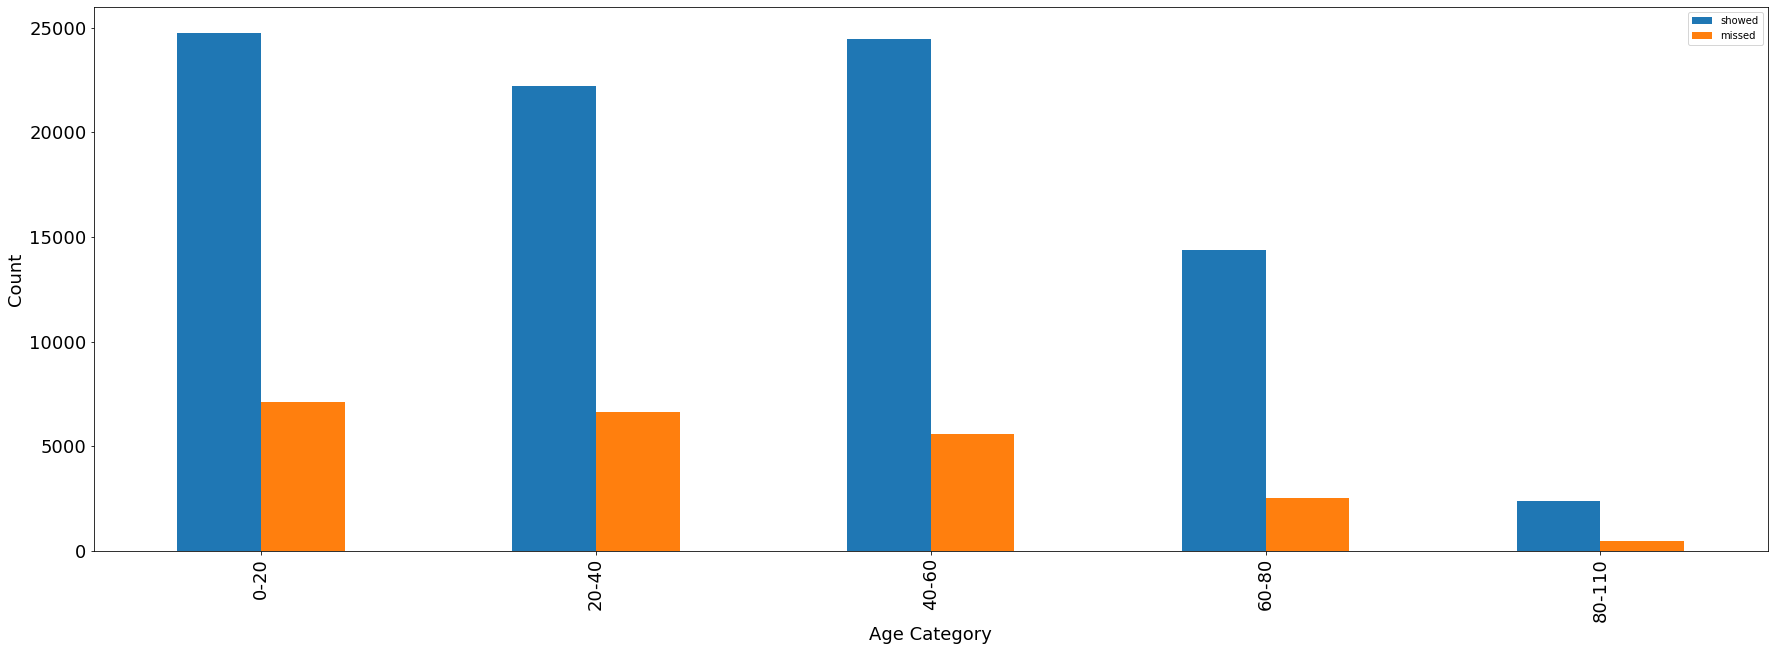

In [87]:
noShow_df.groupby('AgeCategory')['no_show'].value_counts().unstack().plot(kind= 'bar', figsize = (30,10), fontsize = 18)
plt.xlabel('Age Category', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.legend(['showed', 'missed'])

In [88]:
noShow_df.groupby('AgeCategory')['no_show'].value_counts()


AgeCategory  no_show
0-20         No         24752
             Yes         7096
20-40        No         22209
             Yes         6626
40-60        No         24490
             Yes         5591
60-80        No         14373
             Yes         2537
80-110       No          2381
             Yes          466
Name: no_show, dtype: int64

In [89]:
zero2TwentyPerc = (7096/(24752+7096)) * 100
zero2TwentyPerc

22.28083396131625

In [90]:
twentyOne2FourtyPerc = (6626/(22209+6626)) * 100

In [91]:
twentyOne2FourtyPerc

22.97901855384082

In [92]:
fourtyOne2Sixty = (5591/(24490+5591)) * 100
fourtyOne2Sixty 

18.58648316212892

In [93]:
sixtyOne2eighty = (2537/(14373 + 2537)) * 100
sixtyOne2eighty

15.002956830277942

In [94]:
eightyOne2OneTwenty = (469/(2383+469)) * 100
eightyOne2OneTwenty

16.444600280504908

Text(0, 0.5, 'Percent')

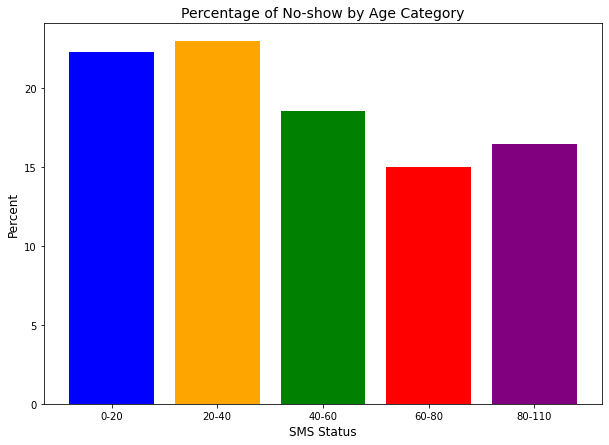

In [95]:
plt.figure(figsize = (10, 7))
plt.bar(   ['0-20', '20-40', '40-60', '60-80', '80-110'],[zero2TwentyPerc, twentyOne2FourtyPerc,fourtyOne2Sixty ,sixtyOne2eighty, eightyOne2OneTwenty  ], color = ['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Percentage of No-show by Age Category', fontsize = 14)
plt.xlabel('SMS Status', fontsize = 12)
plt.ylabel('Percent', fontsize = 12)


Patients aged 60–80 are more likely to attend their next appointment, followed by those aged 80–110, who have a lower no-show rate than the other age groups.

<a id='conclusions'></a>

My primary concern is to determine the factors that are important to predict if a patient will show up or not: these are the result of the analyses:
<ul>
    <li>Patients who fall into the category of 60–80 tend to show up for their appointments, while patients who fall into the category of 20–40 are liable to not show up for their appointments.</li>
    <li>There is no relationship between not showing up for the appointment and gender, as there is no huge difference between a male and a female who did not show up. We can't say which of the genders tends to show up.</li>
    <li>The patients who did not get sponsorship only had a 1% no-show over patients who got sponsorship. The scholarship has no significant</li>
    <li>People who got SMS and missed their appointment were 10.8% greater than people who did not get SMS and missed their appointment. Therefore, the SMS has no significance. </li>
    <li>We can also conclude that the age group 60-80 has the highest number of patients with diabetes, hypertension, and alcoholism than any other age group, which may explain why they do not miss their appointments scheduled after 80-110. </li>
</ul>

## Limitation
Since how the data was collected was not specified in the project, we cannot ascertain the validity of the data.
 




